In [1]:
import os, sys

import numpy as np
import pandas as pd
import lightkurve as lk
from tqdm import tqdm
from tessrip import Rip

from tess_asteroid_ml.utils import *
from tess_asteroid_ml.make_TESS_asteroid_db import *

/Users/jorgemarpa/.pyenv/versions/tess-test/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/jorgemarpa/.lightkurve/cache. Please move all the files in the legacy directory /Users/jorgemarpa/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [95]:
sector = 2
camera = 1
ccd = 3
provider = "mast"

In [64]:
rips = Rip(sector=sector, camera=camera, ccd=ccd)

In [65]:
flx, _ = rips.get_flux(corner=(1014+50, 1058+50), shape=(400, 400))
flx.array.shape

(1245, 400, 400)

In [66]:
flx.array.sum(axis=-1).shape

(1245, 400)

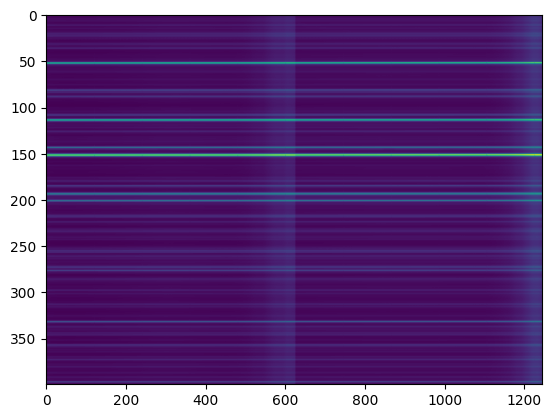

In [67]:
plt.imshow(flx.array.sum(axis=-1).T, aspect="auto")

In [68]:
rips.ncolumns, rips.nrows, 

(2136, 2078)

In [69]:
row, col = np.mgrid[rips.corner[0] : rips.corner[0] + flx.array.shape[1], 
                    rips.corner[1] : rips.corner[1] + flx.array.shape[2]]

In [70]:
col, row

(array([[1108, 1109, 1110, ..., 1505, 1506, 1507],
        [1108, 1109, 1110, ..., 1505, 1506, 1507],
        [1108, 1109, 1110, ..., 1505, 1506, 1507],
        ...,
        [1108, 1109, 1110, ..., 1505, 1506, 1507],
        [1108, 1109, 1110, ..., 1505, 1506, 1507],
        [1108, 1109, 1110, ..., 1505, 1506, 1507]]),
 array([[1064, 1064, 1064, ..., 1064, 1064, 1064],
        [1065, 1065, 1065, ..., 1065, 1065, 1065],
        [1066, 1066, 1066, ..., 1066, 1066, 1066],
        ...,
        [1461, 1461, 1461, ..., 1461, 1461, 1461],
        [1462, 1462, 1462, ..., 1462, 1462, 1462],
        [1463, 1463, 1463, ..., 1463, 1463, 1463]]))

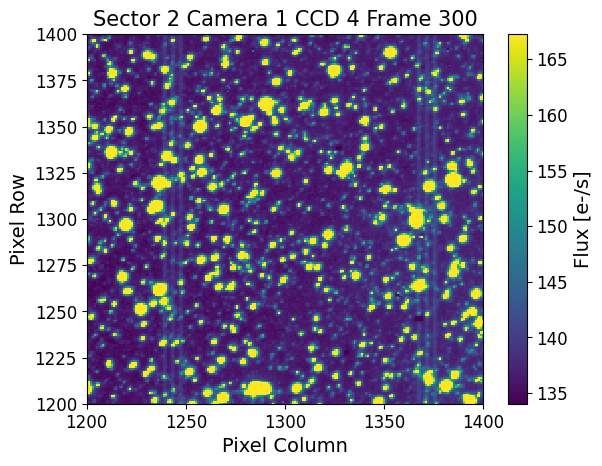

In [166]:
cad = 300

vlo, lo, mid, hi, vhi = np.nanpercentile(flx.array[cad], [0.2, 1, 50, 93, 99.8])

# cbar = plt.imshow(flx.array[cad], cmap="viridis", origin="lower", vmin=vlo, vmax=hi)
cbar = plt.pcolormesh(col, row, flx.array[cad], 
                      cmap="viridis", 
                      rasterized=True,
                      vmin=vlo, vmax=hi)
plt.colorbar(cbar, label="Flux [e-/s]")
plt.title(f"Sector {sector} Camera {camera} CCD {ccd} Frame {cad}")
plt.xlim(1200, 1400)
plt.ylim(1200, 1400)
plt.xlabel("Pixel Column")
plt.ylabel("Pixel Row")
plt.savefig(f"figures/tess_ffi_sector{sector:04}-{camera}-{ccd}_image_zoom.pdf", bbox_inches="tight")
plt.show()

In [109]:
np.nanmedian(flx.array[tdx])

170.20853

In [ ]:
for tdx in range(0, len(rips.time.array), 50):
    plt.plot(np.nanmedian(flx.array[tdx], axis=0) / np.nanmedian(flx.array[tdx]))
plt.show()

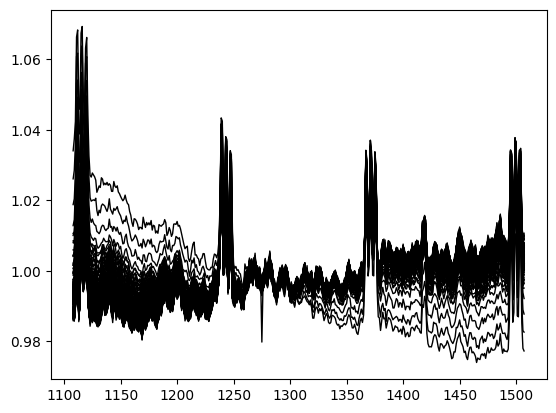

In [114]:
for tdx in range(0, len(rips.time.array), 5):
    plt.plot(col[0], np.nanmedian(flx.array[tdx], axis=0) / np.nanmedian(flx.array[tdx]), lw=1, c="k")
plt.show()

In [118]:
col[0][(np.nanmedian(flx.array[tdx], axis=0) / np.nanmedian(flx.array[tdx])) > 1.03]

array([1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118,
       1119, 1120, 1121, 1122, 1239, 1240, 1243, 1244, 1247, 1248])

15.633587786259541

In [81]:
rips.ffi_names[cad][4:17]

'2018248072941'

In [82]:
ffi_file_tmp = get_FFI_name(sector=sector, camera=camera, ccd=0, correct=False)
print(ffi_file_tmp)

['https://archive.stsci.edu/missions/tess/ffi/s0002/2018/253/1-1/tess2018253025941-s0002-1-1-0121-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0002/2018/253/1-2/tess2018253025941-s0002-1-2-0121-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0002/2018/253/1-3/tess2018253025941-s0002-1-3-0121-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0002/2018/253/1-4/tess2018253025941-s0002-1-4-0121-s_ffic.fits']


In [83]:
ffi_file_tmp[0][67:80][4:7]

'253'

In [84]:
ffi_file = []
for f in ffi_file_tmp:
    date_old = f[67:80]
    date_new = rips.ffi_names[cad][4:17]
    ffi_file.append(f.replace(date_old, 
                              date_new).replace(date_old[:4], 
                                                date_new[:4]).replace(date_old[4:7], 
                                                                      date_new[4:7]))
ffi_file  

['https://archive.stsci.edu/missions/tess/ffi/s0002/2018/248/1-1/tess2018248072941-s0002-1-1-0121-s_ffic.fits',
 'https://archive.stsci.edu/missions/tess/ffi/s0002/2018/248/1-2/tess2018248072941-s0002-1-2-0121-s_ffic.fits',
 'https://archive.stsci.edu/missions/tess/ffi/s0002/2018/248/1-3/tess2018248072941-s0002-1-3-0121-s_ffic.fits',
 'https://archive.stsci.edu/missions/tess/ffi/s0002/2018/248/1-4/tess2018248072941-s0002-1-4-0121-s_ffic.fits']

In [85]:
with fits.open(ffi_file[0]) as ffi:
    date_obs = Time([ffi[0].header["DATE-OBS"], ffi[0].header["DATE-END"]])

COL, ROW, F = {}, {}, {}
for k, ccd in enumerate(range(1,5)):
    col_2d, row_2d, f2d = load_ffi_image(
                    "TESS",
                    ffi_file[k],
                    1,
                    None,
                    [0, 0],
                    return_coords=True,
                )

    COL[ccd] = col_2d
    ROW[ccd] = row_2d
    F[ccd] = f2d

In [86]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [89]:
rips.time.array[cad]

1366.829126830603

In [168]:
# plt.style.use('seaborn-notebook')
plt.rc('axes', labelsize=14) 
plt.rc('axes', titlesize=15)
plt.rc('legend',fontsize=11)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)

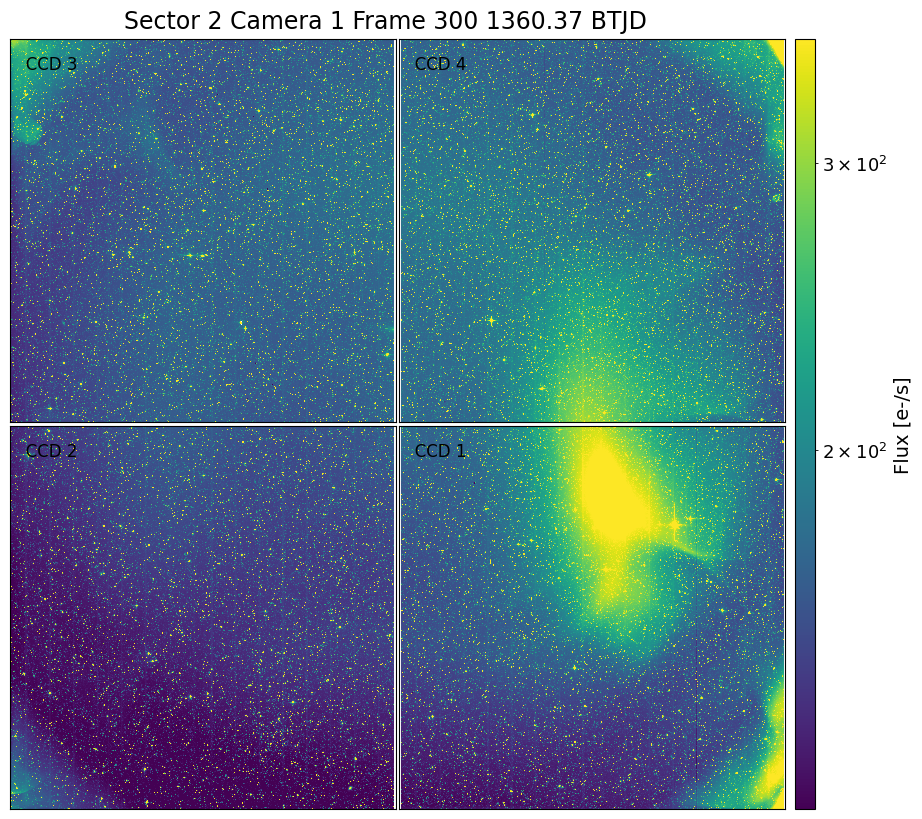

In [171]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.suptitle(f"Sector {sector} Camera {camera} Frame {cad} {rips.time.array[cad]:.2f} BTJD", y=0.91, fontsize=17)

vlo, lo, mid, hi, vhi = np.nanpercentile(F[1], [0.01, 1, 50, 70, 95])

for k, ccd in enumerate(range(1,5)):
    if camera in [1, 2]:
        if ccd == 1:
            ax_ = ax[1, 1]
            ax_.invert_xaxis()
        elif ccd == 2:
            ax_ = ax[1, 0]
            ax_.invert_xaxis()
        elif ccd == 3:
            ax_ = ax[0, 0]
            ax_.invert_yaxis()
        elif ccd == 4:
            ax_ = ax[0, 1]
            ax_.invert_yaxis()

    if camera in [3, 4]:
        if ccd == 1:
            ax_ = ax[0, 0]
            ax_.invert_yaxis()
        elif ccd == 2:
            ax_ = ax[0, 1]
            ax_.invert_yaxis()
        elif ccd == 3:
            ax_ = ax[1, 1]
            ax_.invert_xaxis()
        elif ccd == 4:
            ax_ = ax[1, 0]
            ax_.invert_xaxis()

    cnorm = colors.LogNorm(vmin=vlo, vmax=vhi)
    # cnorm = colors.Normalize(vmin=vlo, vmax=vhi)
    cbar = ax_.pcolormesh(COL[ccd], ROW[ccd], F[ccd], 
                   norm=cnorm, cmap="viridis", 
                   rasterized=True)
    # ax_.imshow(F[ccd], norm=cnorm, cmap="viridis", origin="lower")
    
    ax_.set_title(f"   CCD {ccd}", loc="left", y=0.9, fontsize=12)

    ax_.axis('equal')
    # ax_.axis('off')
    ax_.set_xticks([])
    ax_.set_yticks([])

# fig.colorbar(cbar, ax=ax[-1], label="Flux [e-/s]", 
#              orientation="horizontal", pad=1, aspect=50)

cbar_ax = fig.add_axes([0.91, 0.11, 0.02, 0.77])

fig.colorbar(cbar, cax=cbar_ax, label="Flux [e-/s]", aspect=50)

# ax[1,0].set_xlabel("Pixel Column")
# ax[1,1].set_xlabel("Pixel Column")
# ax[0,0].set_ylabel("Pixel Row")
# ax[1,0].set_ylabel("Pixel Row")

plt.subplots_adjust(wspace=0.01, hspace=0.01)

plt.savefig(f"figures/tess_ffi_sector{sector:04}-{camera}_image.pdf", bbox_inches="tight")

plt.show()

In [123]:
F[1]

(2048, 2048)

In [153]:
12 * 3 * 8 / 2048

0.140625

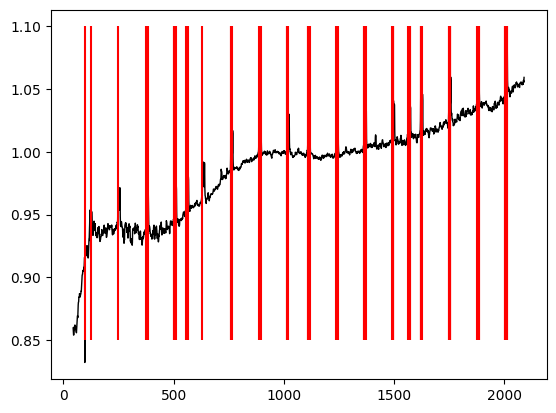

In [150]:
plt.plot(COL[3][0], 
         np.nanmedian(F[3], axis=0) / np.nanmedian(F[3]), 
         lw=1, c="k")
# plt.vlines(123 + np.arange(20) * 130, 0.85, 1.1, color="r")
plt.vlines(COL[3][0][np.where((np.gradient(np.nanmedian(F[3], axis=0) / np.nanmedian(F[3])) > 0.01))[0]], 0.85, 1.1, color="r")
plt.show()

In [146]:
COL[3][0][np.where((np.gradient(np.nanmedian(F[3], axis=0) / np.nanmedian(F[3])) > 0.01))[0]]

array([  98,  123,  247,  375,  379,  380,  383,  503,  504,  511,  558,
        566,  631,  759,  760,  763,  887,  891,  895, 1015, 1016, 1019,
       1109, 1110, 1113, 1117, 1237, 1241, 1245, 1365, 1366, 1369, 1373,
       1493, 1494, 1497, 1498, 1566, 1574, 1575, 1621, 1622, 1625, 1629,
       1749, 1750, 1753, 1754, 1757, 1877, 1881, 1882, 1885, 1886, 2005,
       2006, 2009, 2010, 2013, 2014])